<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/machine_learning/09_kmeans_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Landuse / Landcover Classification using Sentinel-2 and KMeans

## Libraries

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pooch
import rasterio as rio
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

## Data Preparation

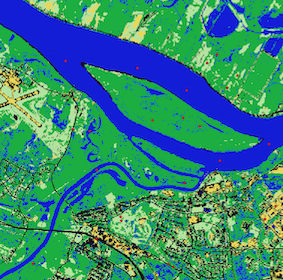](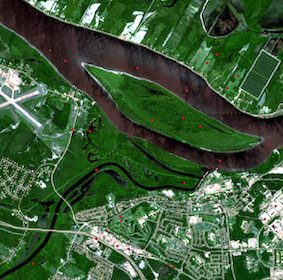)

In [3]:
sentinel2_img = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/oromocto_jun2021_composite.tif',
    known_hash='e08df41e0f301d684f9ed1a487b9abccaf431fd3df25fa5f10da82d44e6b733d'
)

In [4]:
with rio.open(sentinel2_img) as src:
    cfg = src.profile
    n, h, w = cfg['count'], cfg['height'], cfg['width']
    data = (
        SimpleImputer(missing_values=np.nan, strategy='mean')
        .fit_transform(src.read().reshape(n, h * w).T)
    )

In [5]:
data.shape

(373305, 10)

## Training the Model

In [6]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans

KMeans(n_clusters=5, n_init='auto', random_state=42)

## Prediction

In [7]:
pred = kmeans.fit_predict(data).reshape(h, w)
pred.shape

(607, 615)

In [8]:
cfg.update(count=1)
with rio.open('classified.tif', 'w', **cfg) as out:
    out.write(pred, 1)

# Result
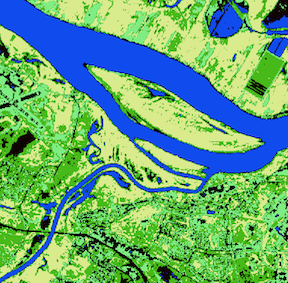

# Full Code

In [9]:
"""
Vaasudevan Srinivasan 🧑🏻‍💻
StratagemGIS Solutions
Script to perform KMeans using Sentinel-2
"""


import numpy as np
import rasterio as rio
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Read the sentinel-2 image and fill the missing values with mean
with rio.open(sentinel2_img) as src:
    cfg = src.profile
    n, h, w = cfg['count'], cfg['height'], cfg['width']
    data = (
        SimpleImputer(missing_values=np.nan, strategy='mean')
        .fit_transform(src.read().reshape(n, h * w).T)
    )  # (373305, 10)


# Train the KMeans model and get the prediction
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
pred = kmeans.fit_predict(data).reshape(h, w)  # (607, 615)


# Write the result
cfg.update(count=1)
with rio.open('classified.tif', 'w', **cfg) as out:
    out.write(pred, 1)